In [2]:
from importlib import reload 
import mass_function as mf
import sampler as sm
import mass_profile as mp
import numpy as np
import survey
import accel_data as ad
import matplotlib.pyplot as plt
import astropy.units as u
import scipy
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
cdm_new = mf.CDM_Test(m_l=np.logspace(0,6,100))
cdm_old = mf.CDM_Old(m_l=np.logspace(0,6,100))

In [6]:
cdm_new = mf.CDM_Test(m_l=np.logspace(0,6,10))
# cdm_new_norm = mf.CDM_Test(m_l=np.logspace(0,6,10), loga=(np.log10(3.26 * 10 ** -2)))
cdm_new_upper = mf.CDM_Test(m_l = np.logspace(0, 6, 10), b= -0.01, logc=12)
cdm_new_lower = mf.CDM_Test(m_l = np.logspace(0, 6, 10), b= -8, logc=1)

In [266]:
cdm_old = mf.CDM_Old(m_l=np.logspace(0,6,10))
cdm_old_upper = mf.CDM_Old(m_l = np.logspace(0, 6, 10), b= -0.65, logc=12)
cdm_old_lower = mf.CDM_Old(m_l = np.logspace(0, 6, 10), b= -8, logc=1)

N*norm [4.41162496e+00 1.10815009e+00 2.78354717e-01 6.99195436e-02
 1.75629953e-02 4.41162496e-03 1.10815009e-03 2.78354717e-04
 6.99195436e-05 0.00000000e+00]
final nl= [4 1 0 0 0 0 0 0 0 0]
N*norm [4.37171411e-06 7.48143809e-06 1.28031968e-05 2.19104730e-05
 3.74960126e-05 6.41679877e-05 1.09812493e-04 1.87925228e-04
 3.21601762e-04 0.00000000e+00]
final nl= [0 0 0 0 0 0 0 0 0 1]
N*norm [7.92580699e+01 1.70756335e-03 3.67883367e-08 7.89362504e-13
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
final nl= [79  0  0  0  0  0  0  0  0  0]


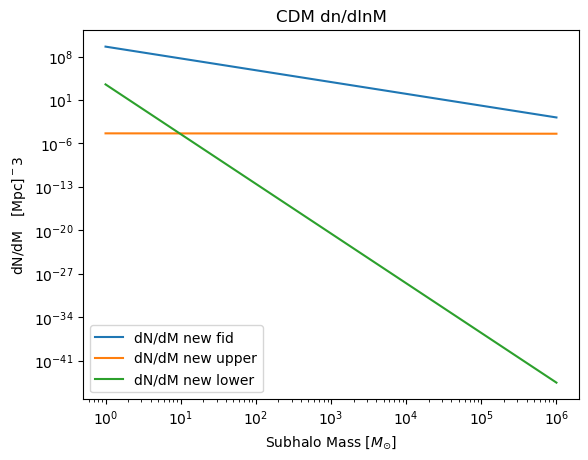

In [7]:
plt.title('CDM dn/dlnM')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(cdm_new.m_l,cdm_new.den_n_l, label='dN/dM new fid')
# plt.plot(cdm_old.m_l,cdm_old.den_n_l, label='dN/dM old fid')
plt.plot(cdm_new_upper.m_l,cdm_new_upper.den_n_l, label='dN/dM new upper')
# plt.plot(cdm_old_upper.m_l,cdm_old_upper.den_n_l, label='dN/dM old upper')
plt.plot(cdm_new_lower.m_l,cdm_new_lower.den_n_l, label='dN/dM new lower')
# plt.plot(cdm_old_lower.m_l,cdm_old_lower.den_n_l, label='dN/dM old lower')
plt.legend()
plt.show()

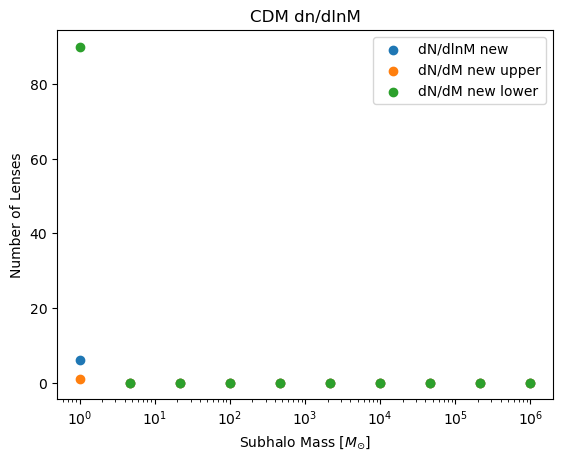

In [8]:
plt.title('CDM dn/dlnM')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'Number of Lenses')
plt.scatter(cdm_new.m_l,cdm_new.n_l, label='dN/dlnM new')
# plt.scatter(cdm_old.m_l,cdm_old.n_l, label='dN/dlnM old')
plt.scatter(cdm_new_upper.m_l,cdm_new_upper.n_l, label='dN/dM new upper')
# plt.scatter(cdm_old_upper.m_l,cdm_old_upper.n_l, label='dN/dM old upper')
plt.scatter(cdm_new_lower.m_l,cdm_new_lower.n_l, label='dN/dM new lower')
# plt.scatter(cdm_old_lower.m_l,cdm_old_lower.n_l, label='dN/dM old lower')
plt.legend()
plt.show()

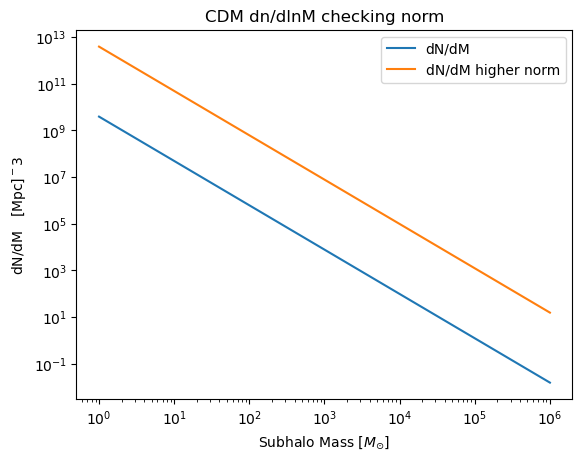

In [111]:
plt.title('CDM dn/dlnM checking norm')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(cdm_new.m_l,cdm_new.den_n_l, label='dN/dM')
plt.plot(cdm_new_norm.m_l,cdm_new_norm.den_n_l, label='dN/dM higher norm')
plt.legend()
plt.show()

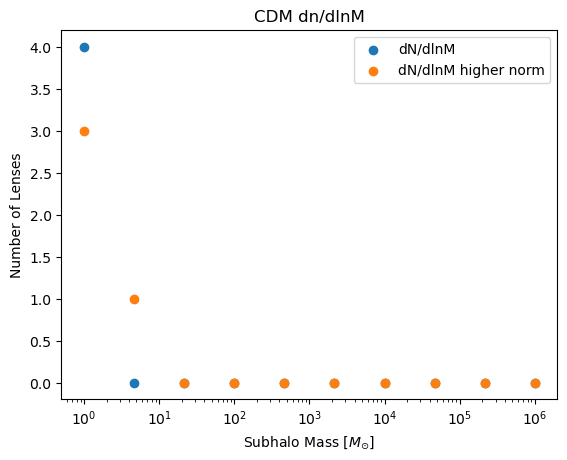

In [112]:
plt.title('CDM dn/dlnM')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.ylabel(r'Number of Lenses')
plt.scatter(cdm_new.m_l,cdm_new.n_l, label='dN/dlnM')
plt.scatter(cdm_new_norm.m_l,cdm_new_norm.n_l, label='dN/dlnM higher norm')
plt.legend()
plt.show()

In [70]:
sum(cdm_new.n_l), sum(cdm_new_norm.n_l)

(11, 16)

In [296]:
cdm_b = []
b = np.linspace(-8,-0.65,100)
for i in range(len(b)):
    cdm_b.append(mf.CDM_Test(m_l = np.logspace(0, 6, 100), b=b[i]))

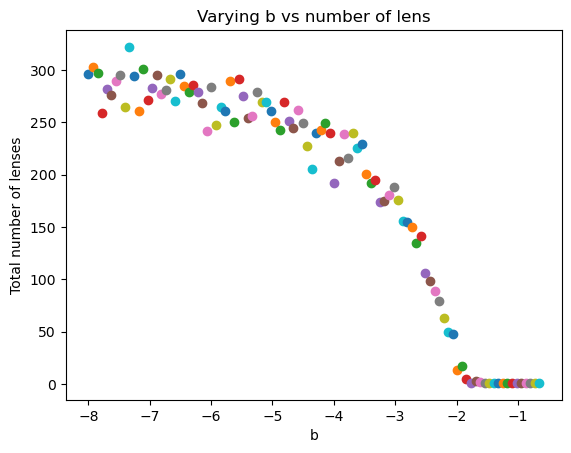

In [294]:
for i in range(len(b)):
    plt.scatter(b[i],sum(cdm_b[i].n_l))
plt.title('Varying b vs number of lens')
plt.ylabel('Total number of lenses')
plt.xlabel('b')
plt.show()

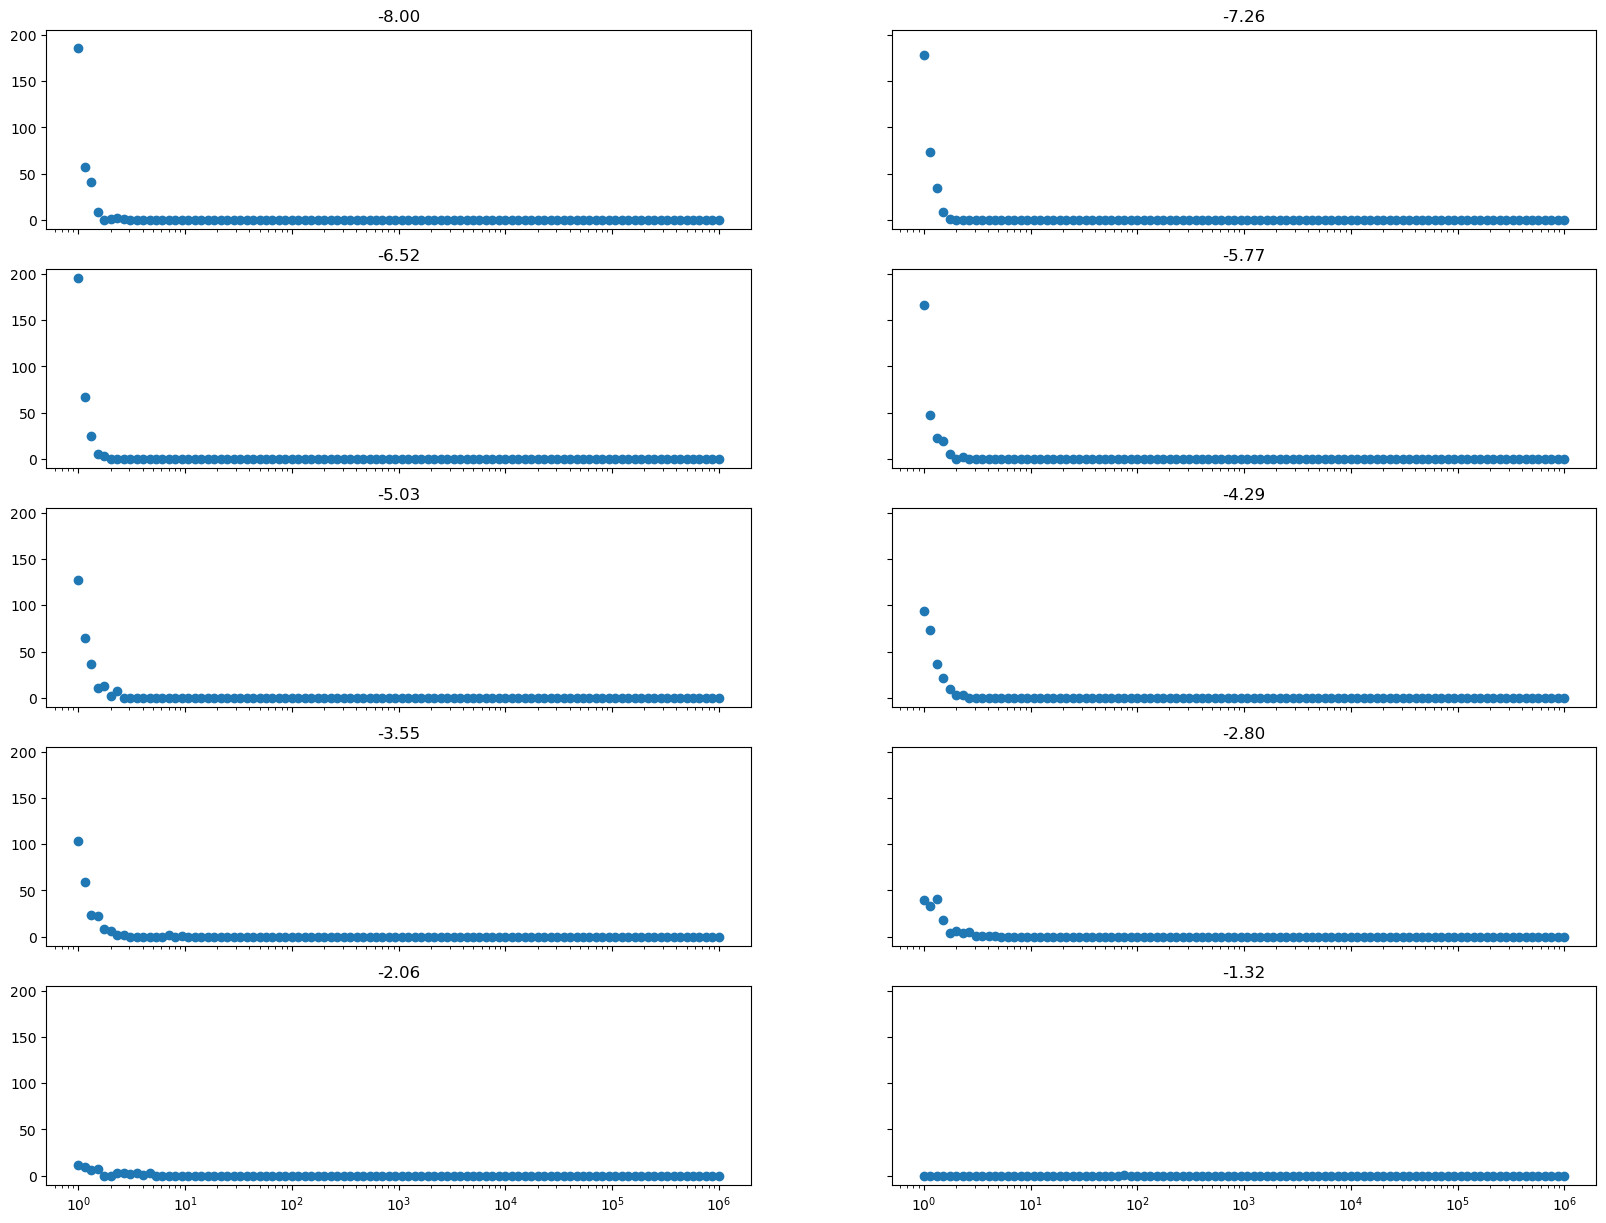

In [295]:
fig, ax = plt.subplots(5,2,sharex='all',sharey='all',figsize=(20,15))
ctr = 0 
for i in range(5):
    for j in range(2):
        ax[i,j].scatter(cdm_b[ctr].m_l,cdm_b[ctr].n_l)
        ax[i,j].set_title(f'{b[ctr]:.2f}')
        ax[i,j].set_xscale('log')
        ctr+=10
        #print(ctr)

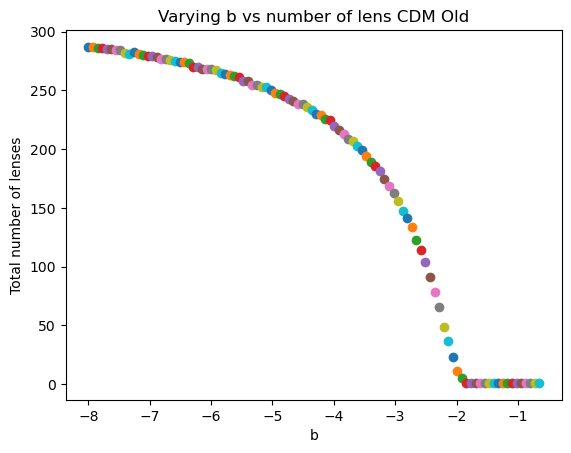

In [297]:
for i in range(len(b)):
    plt.scatter(b[i],sum(cdm_b[i].n_l))
plt.title('Varying b vs number of lens CDM Old')
plt.ylabel('Total number of lenses')
plt.xlabel('b')
plt.show()

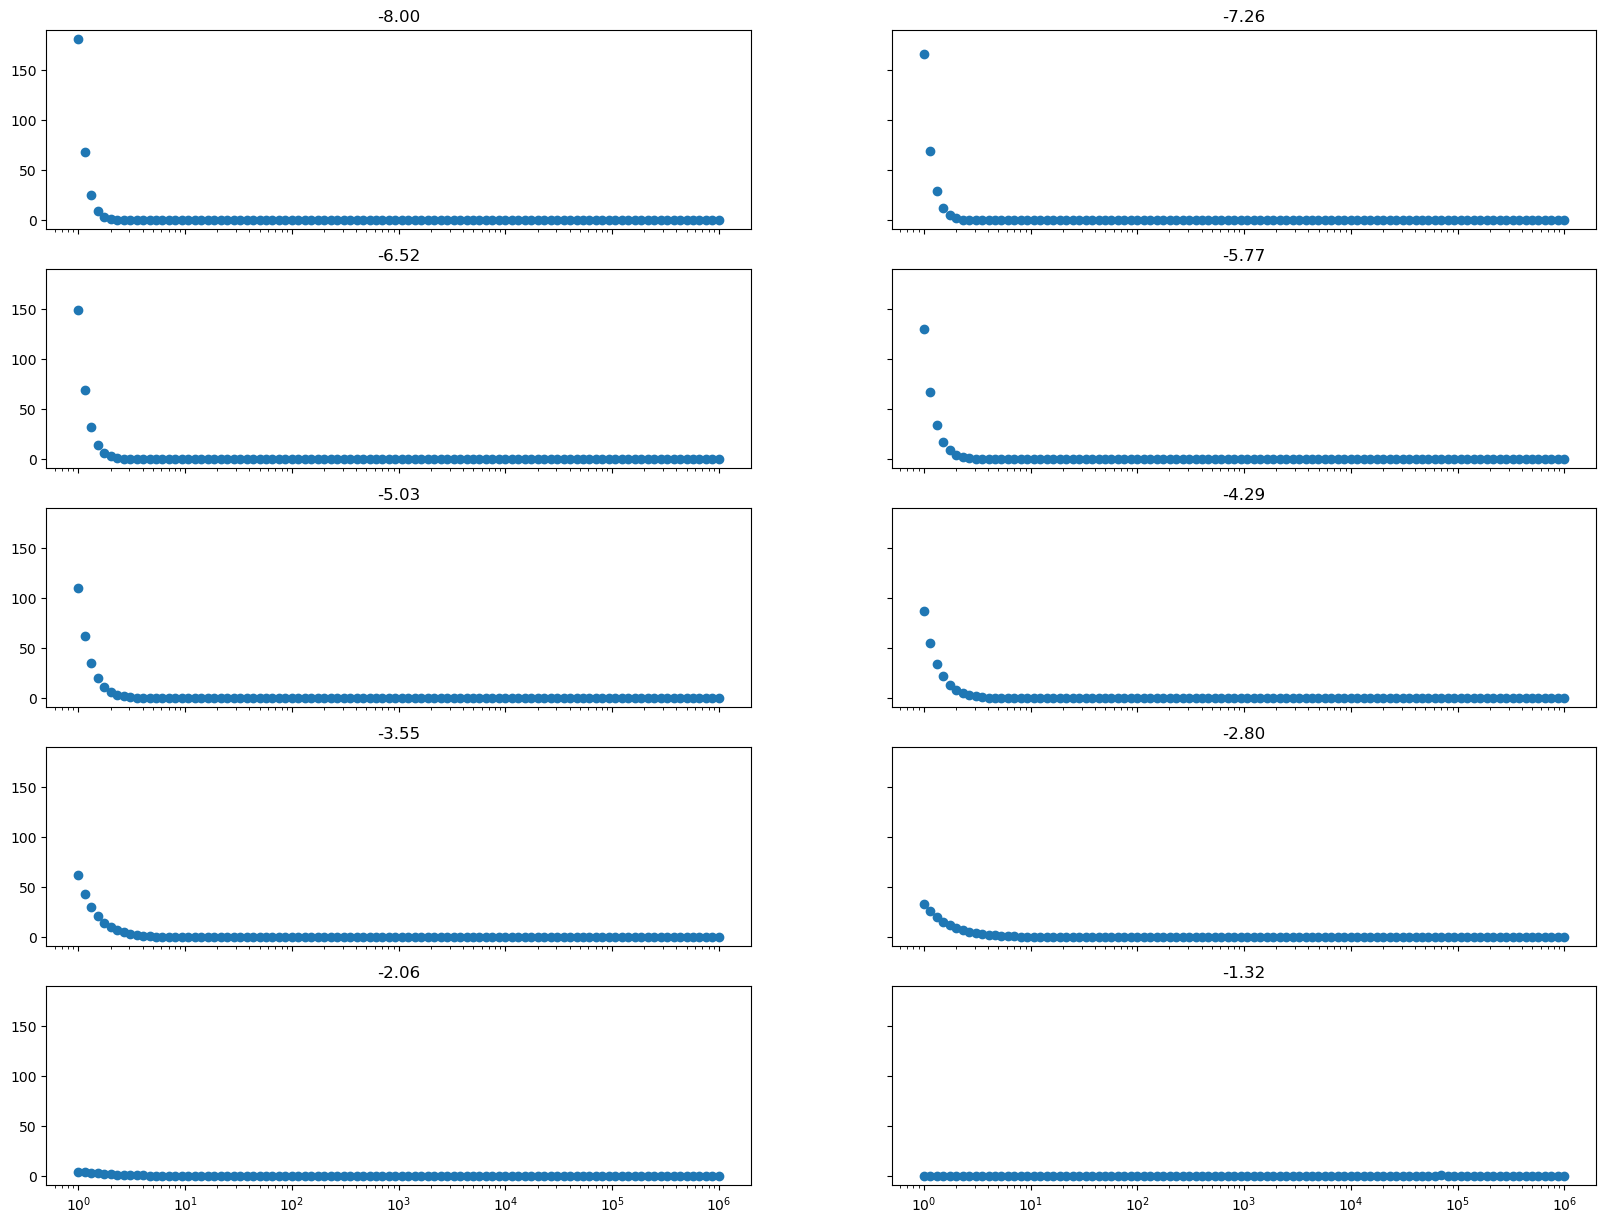

In [298]:
fig, ax = plt.subplots(5,2,sharex='all',sharey='all',figsize=(20,15))
ctr = 0 
for i in range(5):
    for j in range(2):
        ax[i,j].scatter(cdm_b[ctr].m_l,cdm_b[ctr].n_l)
        ax[i,j].set_title(f'{b[ctr]:.2f}')
        ax[i,j].set_xscale('log')
        ctr+=10
        #print(ctr)

## Likelihood

In [3]:
r = survey.Roman()
a = ad.AccelData(r,nstars=100,ndims=2)
nfw = mp.NFW(Ml=1.e5*u.Msun, c200= 13)

Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_2_2_0_2024:06:25-22.15.48.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_2_2_0_2024:06:25-22.15.48.png
(100, 2)
2024-06-25T22:15:49.076875: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_2_2_0_2024:06:25-22.15.48.png


In [319]:
%%time
cb = []
b = np.linspace(-8,-0.65,100)
for i in range(len(b)):
    cb.append(a.lnlike([np.log10(13),b[i],np.log10(2.57 * 10 ** 7)],r,1000,nfw,cdm_new))

CPU times: user 30.3 s, sys: 49.7 ms, total: 30.3 s
Wall time: 30.5 s


In [18]:
%%time
maxpoints= np.zeros(100)
max_avg = np.zeros(100)
for i in range(100):
    cb = []
    b_max = np.linspace(-8,-0.1,100)
    for j in range(len(b_max)):
        cb.append(a.lnlike([np.log10(13),b_max[j],np.log10(2.57 * 10 ** 7)],r,100,nfw,cdm_new))
        maxpoints[j]=np.average(cb)
    max_avg+=maxpoints
# max_avg/=100

CPU times: user 33min 58s, sys: 9.18 s, total: 34min 7s
Wall time: 34min 17s


In [19]:
max_avg

array([-36913.38678794, -36913.83208308, -36913.81119285, -36913.9159236 ,
       -36914.01757835, -36914.02591135, -36914.03946219, -36917.93394581,
       -36917.49630131, -36917.16701622, -36916.90179039, -36916.70672222,
       -36916.49188813, -36916.31509451, -36916.28825813, -36916.22302751,
       -36916.2225586 , -36916.09243635, -36916.00072583, -36915.92777041,
       -36915.82904935, -36915.75584517, -36915.88443742, -36915.8450137 ,
       -36915.82349183, -36915.73912969, -36915.75032779, -36915.67656235,
       -36915.60207452, -36918.76009947, -36918.59933135, -36918.45222993,
       -36918.27033805, -36918.14537217, -36918.01831668, -36917.90261871,
       -36917.79602542, -36917.68751543, -36917.58432346, -36917.5018219 ,
       -36917.42564463, -36917.34444445, -36917.27655982, -36917.19532601,
       -36917.22032632, -36917.14705597, -36917.08587897, -36917.02456262,
       -36916.96131123, -36916.90465199, -36916.85124213, -36916.91280288,
       -36916.86133049, -

Text(0.5, 0, '$b$')

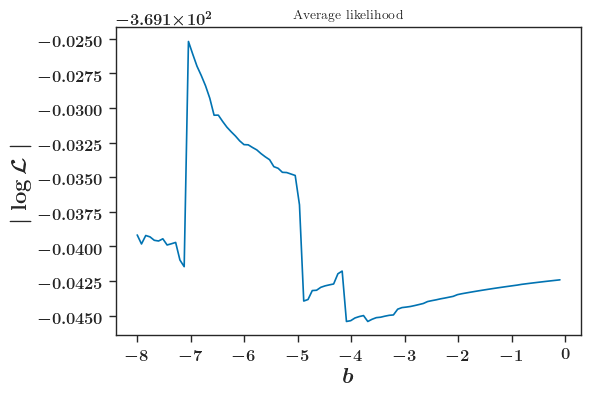

In [20]:
plt.plot(b_max,maxpoints)
plt.title('Average likelihood')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$')
plt.xlabel(r'$b$')

Text(0.5, 0, '$b$')

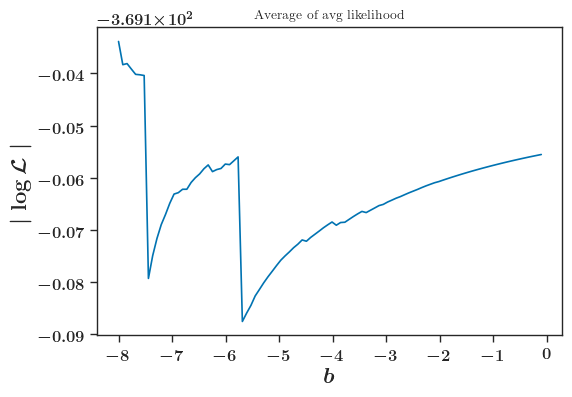

In [21]:
plt.plot(b_max,max_avg/100)
plt.title('Average of avg likelihood')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$')
plt.xlabel(r'$b$')

Text(0.5, 0, '$b$')

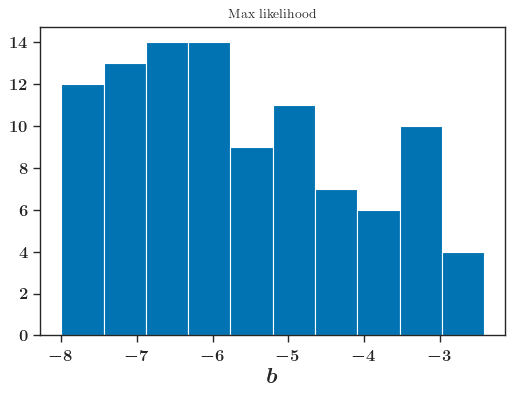

In [9]:
plt.hist(b_max[maxpoints])
plt.title('Max likelihood')
plt.xlabel(r'$b$')

Text(0, 0.5, '$\\mid \\log \\mathcal{L} \\mid$')

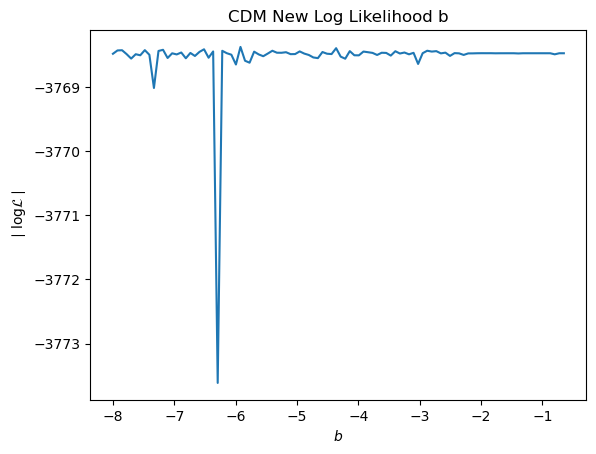

In [320]:
plt.plot(b,cb)
plt.title('CDM New Log Likelihood b')
plt.xlabel(r'$b$')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$')

Text(0, 0.5, '$\\mid \\log \\mathcal{L} \\mid$')

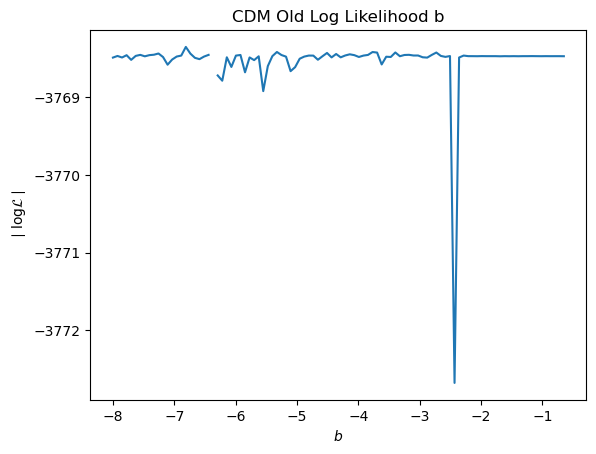

In [317]:
plt.plot(b,cb)
plt.title('CDM Old Log Likelihood b')
plt.xlabel(r'$b$')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$')